In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

# To import data
import gdown
from io import StringIO

In [2]:
# # Import divisions dataset
# i = 0
# for url in urls:
#     i += 1
#     division = url.split('/')[-2]
#     url_division = f"https://drive.google.com/uc?id={division}"

#     output_division = f'division_{i}.csv'
#     gdown.download(url_division, output_division, quiet=False)

In [3]:
url_songs = 'https://drive.google.com/file/d/1VzusDuyAMxAoxuBOu8YJNyo8gV82b0cE/view?usp=sharing'
path_songs_id = url_songs.split('/')[-2]
path_songs = f"https://drive.google.com/uc?id={path_songs_id}"
# gdown.download(path_songs, songs_embedded_df, quiet=False)
gdown.download(path_songs, 'embedded_songs.csv', quiet=False)


# songs_embedded_df = pd.read_csv(path_songs)
songs_embedded_df = pd.read_csv('embedded_songs.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1VzusDuyAMxAoxuBOu8YJNyo8gV82b0cE
From (redirected): https://drive.google.com/uc?id=1VzusDuyAMxAoxuBOu8YJNyo8gV82b0cE&confirm=t&uuid=cf2442fe-a1e9-488e-ad8f-1b164c1402fb
To: /content/embedded_songs.csv
100%|██████████| 2.06G/2.06G [00:22<00:00, 91.5MB/s]


In [4]:
print(songs_embedded_df)

        song_id        Q1        Q2        Q3        Q4        Q5        Q6  \
0             0 -0.073393 -0.119854 -0.008930  0.000051 -0.037098  0.060883   
1             1 -0.041431 -0.068413 -0.030014 -0.046955 -0.046901  0.064035   
2             2 -0.017290 -0.024262 -0.000928 -0.033170 -0.037053  0.065845   
3             3 -0.016522 -0.042907 -0.001781 -0.038092 -0.056973  0.078868   
4             4  0.023820 -0.102000  0.006704  0.039884 -0.021866  0.060038   
...         ...       ...       ...       ...       ...       ...       ...   
435850   450122 -0.100579 -0.046126 -0.043400 -0.019513 -0.020387  0.065560   
435851   450123 -0.127407 -0.064143  0.034869 -0.020009 -0.019903  0.091031   
435852   450124 -0.062694 -0.105539  0.014201 -0.070270 -0.048686  0.015299   
435853   450125 -0.054374 -0.099386  0.002471 -0.005125 -0.049959  0.019869   
435854   450126 -0.029113  0.017079 -0.006123  0.014579 -0.020033 -0.011935   

              Q7        Q8        Q9  ...      Q375

In [5]:
url_events = 'https://drive.google.com/file/d/1qYjdla35SWFpPFBi24uIJXzErMIGWQUi/view?usp=sharing'
path_events = 'https://drive.google.com/uc?export=download&id='+url_events.split('/')[-2]
event_embeddings_v1_df = pd.read_csv(path_events)

In [6]:
event_embeddings_v1_df.head()

,EventCode,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_374,dim_375,dim_376,dim_377,dim_378,dim_379,dim_380,dim_381,dim_382,dim_383
0,1413,-0.021640,0.092606,0.000398,-0.010073,-0.019410,0.073137,0.019721,0.018777,-0.044716,...,0.084632,0.086719,0.000282,0.004671,-0.062479,0.066642,0.126728,0.185229,0.001672,0.027591
1,1414,-0.010420,0.030111,0.033047,-0.031883,0.000189,0.041970,-0.076940,-0.073160,0.014532,...,0.029360,-0.013575,0.064565,0.043103,-0.046829,0.034354,0.049309,-0.042716,0.031050,-0.065633
2,1431,0.000552,0.061200,0.072482,0.007930,0.073794,0.081634,0.015473,-0.036991,0.006676,...,0.084282,-0.013112,-0.002360,-0.002201,-0.064300,-0.024541,0.133183,-0.075717,-0.035333,0.032761
3,1432,0.006940,0.068486,0.065690,-0.017111,0.081493,0.105526,0.063645,-0.029573,-0.025323,...,0.086302,-0.031998,-0.026142,-0.000712,-0.022631,0.006062,0.094120,-0.060563,-0.042275,0.018250
4,1433,0.006056,0.084824,0.035867,0.016662,0.054566,0.102494,0.079147,-0.054465,-0.006691,...,0.084619,0.013784,-0.002689,-0.003078,-0.018814,-0.016930,0.132929,0.005337,-0.040209,0.041834


In [7]:
event_names_csv = """
Code,Description
1413,"Demonstrate for rights"
1414,"Demonstrate for change in institutions, regime"
1431,"Conduct strike or boycott for leadership change"
1432,"Conduct strike or boycott for policy change"
1433,"Conduct strike or boycott for rights"
1434,"Conduct strike or boycott for change in institutions, regime"
1451,"Engage in violent protest for leadership change"
1452,"Engage in violent protest for policy change"
1453,"Engage in violent protest for rights"
1454,"Engage in violent protest for change in institutions, regime"
161,"Reduce or break diplomatic relations"
163,"Impose embargo, boycott, or sanctions"
174,"Expel or deport individuals"
175,"Use tactics of violent repression"
176,"Attack cybernetically"
190,"Use conventional military force"
191,"Impose blockade, restrict movement"
192,"Occupy territory"
193,"Fight with small arms and light weapons"
194,"Fight with artillery and tanks"
196,"Violate ceasefire"
200,"Use unconventional mass violence"
201,"Engage in mass expulsion"
202,"Engage in mass killings"
203,"Engage in ethnic cleansing"
2041,"Use chemical, biological, or radiological weapons"
2042,"Detonate nuclear weapons"
"""

In [8]:
# url_event_names = 'https://drive.google.com/file/d/1LFDrf1tYdKiiDQa2Yy8mnl9UVPFH2giP/view?usp=sharing'
# path_event_names = 'https://drive.google.com/uc?export=download&id='+url_event_names.split('/')[-2]
# event_names_df = pd.read_csv(path_event_names)

event_names_df = pd.read_csv(StringIO(event_names_csv))

event_names_df.head()

,Code,Description
0,1413,Demonstrate for rights
1,1414,"Demonstrate for change in institutions, regime"
2,1431,Conduct strike or boycott for leadership change
3,1432,Conduct strike or boycott for policy change
4,1433,Conduct strike or boycott for rights


In [9]:
event_names_df

,Code,Description
0,1413,Demonstrate for rights
1,1414,"Demonstrate for change in institutions, regime"
2,1431,Conduct strike or boycott for leadership change
3,1432,Conduct strike or boycott for policy change
4,1433,Conduct strike or boycott for rights
5,1434,Conduct strike or boycott for change in instit...
6,1451,Engage in violent protest for leadership change
7,1452,Engage in violent protest for policy change
8,1453,Engage in violent protest for rights
9,1454,Engage in violent protest for change in instit...


In [10]:
# Event clusters
event_clusters_df = pd.DataFrame({
    'cluster': ['14', '16', '17', '19', '20'],
    'cluster_name': [
        'Protests',
        'Reduce Relations',
        'Coerce',
        'Fight',
        'Unconventional Mass Violence'
    ]
})

In [11]:
event_clusters_df

,cluster,cluster_name
0,14,Protests
1,16,Reduce Relations
2,17,Coerce
3,19,Fight
4,20,Unconventional Mass Violence


In [12]:
# Asumiendo que tus df están así:
# complete_df: shape (435000, 384) y tiene columna 'song_id'
# event_embeddings_v1_df: shape (27, 384), y las columnas ya son solo los embeddings

# Opcional: separa el index (song_id) si no está ya
song_ids = songs_embedded_df['song_id'].reset_index(drop=True)
song_vectors = songs_embedded_df.drop(columns=['song_id']).reset_index(drop=True)

# Lo mismo para los eventos
event_vectors = event_embeddings_v1_df.drop(columns=['EventCode']).reset_index(drop=True)

# Tamaño del batch (ajústalo si igual se te cae; puedes probar con 5000)
batch_size = 10000
n_batches = int(np.ceil(len(song_vectors) / batch_size))

# Resultado parcial
results = []

for i in range(n_batches):
    print(f"Procesando batch {i+1}/{n_batches}")
    start = i * batch_size
    end = min((i + 1) * batch_size, len(song_vectors))

    batch = song_vectors.iloc[start:end].to_numpy()

    # Cosine similarity batch vs todos los eventos
    sim = cosine_similarity(batch, event_vectors.to_numpy())

    # Guardar con el song_id real
    partial_df = pd.DataFrame(sim, columns=event_embeddings_v1_df['EventCode'])
    partial_df.insert(0, 'song_id', song_ids[start:end].values)

    results.append(partial_df)

# Unimos todos los resultados en un solo df
cosine_sim_df = pd.concat(results, ignore_index=True)

Procesando batch 1/44
Procesando batch 2/44
Procesando batch 3/44
Procesando batch 4/44
Procesando batch 5/44
Procesando batch 6/44
Procesando batch 7/44
Procesando batch 8/44
Procesando batch 9/44
Procesando batch 10/44
Procesando batch 11/44
Procesando batch 12/44
Procesando batch 13/44
Procesando batch 14/44
Procesando batch 15/44
Procesando batch 16/44
Procesando batch 17/44
Procesando batch 18/44
Procesando batch 19/44
Procesando batch 20/44
Procesando batch 21/44
Procesando batch 22/44
Procesando batch 23/44
Procesando batch 24/44
Procesando batch 25/44
Procesando batch 26/44
Procesando batch 27/44
Procesando batch 28/44
Procesando batch 29/44
Procesando batch 30/44
Procesando batch 31/44
Procesando batch 32/44
Procesando batch 33/44
Procesando batch 34/44
Procesando batch 35/44
Procesando batch 36/44
Procesando batch 37/44
Procesando batch 38/44
Procesando batch 39/44
Procesando batch 40/44
Procesando batch 41/44
Procesando batch 42/44
Procesando batch 43/44
Procesando batch 44/

In [13]:
cosine_sim_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435855 entries, 0 to 435854
Data columns (total 28 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   song_id  435855 non-null  int64  
 1   1413     435855 non-null  float64
 2   1414     435855 non-null  float64
 3   1431     435855 non-null  float64
 4   1432     435855 non-null  float64
 5   1433     435855 non-null  float64
 6   1434     435855 non-null  float64
 7   1451     435855 non-null  float64
 8   1452     435855 non-null  float64
 9   1453     435855 non-null  float64
 10  1454     435855 non-null  float64
 11  161      435855 non-null  float64
 12  163      435855 non-null  float64
 13  174      435855 non-null  float64
 14  175      435855 non-null  float64
 15  176      435855 non-null  float64
 16  190      435855 non-null  float64
 17  191      435855 non-null  float64
 18  192      435855 non-null  float64
 19  193      435855 non-null  float64
 20  194      435855 non-null  

In [14]:
cosine_sim_df.describe()

EventCode,song_id,1413,1414,1431,1432,1433,1434,1451,1452,1453,...,192,193,194,196,200,201,202,203,2041,2042
count,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,...,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000
mean,225040.580051,0.100404,0.019567,0.063768,0.057552,0.090780,0.053865,0.095923,0.079397,0.112970,...,0.102552,0.061435,0.044673,0.032774,0.096506,0.085992,0.105533,0.042177,-0.013823,0.046292
std,129920.488181,0.052634,0.058535,0.053246,0.053549,0.053723,0.056775,0.061745,0.060279,0.062795,...,0.056860,0.057220,0.054827,0.064811,0.070726,0.056342,0.061884,0.055924,0.049158,0.053028
min,0.000000,-0.137337,-0.228651,-0.166336,-0.174361,-0.160277,-0.207897,-0.164824,-0.160880,-0.140432,...,-0.210186,-0.166218,-0.183500,-0.231291,-0.171839,-0.148969,-0.157257,-0.169707,-0.233257,-0.238323
25%,112517.500000,0.064472,-0.019336,0.027745,0.021404,0.055091,0.014952,0.053707,0.038495,0.070491,...,0.064676,0.022069,0.008452,-0.012873,0.047782,0.048573,0.063569,0.004307,-0.046496,0.011025
50%,224932.000000,0.096595,0.015889,0.062262,0.056528,0.089409,0.052334,0.092926,0.076120,0.110078,...,0.102866,0.056194,0.042035,0.030866,0.093511,0.084290,0.100934,0.039703,-0.015678,0.044520
75%,337535.500000,0.132528,0.053835,0.097603,0.091983,0.124747,0.090424,0.134452,0.116349,0.151836,...,0.139976,0.095200,0.077627,0.075966,0.141455,0.121183,0.142565,0.076411,0.016553,0.079430
max,450126.000000,0.493983,0.435142,0.452572,0.475620,0.487920,0.483528,0.551427,0.512486,0.542184,...,0.440711,0.488235,0.481336,0.461254,0.568856,0.412024,0.496121,0.427556,0.421695,0.449043


In [15]:
# event_embeddings_v1_df.iloc[0,1:6]

In [16]:
# # Revisa una fila cualquiera
# cosine_sim_df.iloc[123]

# # Máximo valor de similitud
# cosine_sim_df.drop(columns=['song_id']).max().max()below

# # Mínimo valor de similitud
# cosine_sim_df.drop(columns=['song_id']).min().min()

In [17]:
# DOWNLOAD SIMILARITY COSINE DATAFRAME

# # Save results
# cosine_sim_df.to_csv("similarities_df.csv", index=False)

# # Descargar el archivo
# from google.colab import files
# files.download("similarities_df.csv")

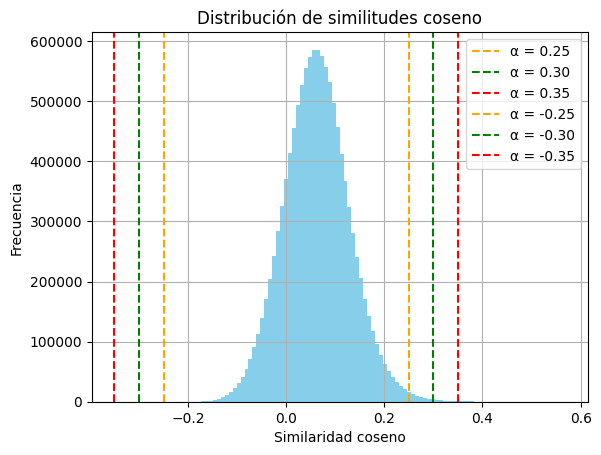

Estadísticas básicas:
Min: -0.238, Max: 0.569
Percentil 75: 0.105
Percentil 85: 0.130
Percentil 90: 0.147


In [18]:
# sim_values = cosine_sim_df.values.flatten()
sim_values = cosine_sim_df.drop(columns=['song_id']).values.flatten()
sim_values = sim_values[~np.isnan(sim_values)]
plt.hist(sim_values, bins=100, color='skyblue')
plt.axvline(0.25, color='orange', linestyle='--', label='α = 0.25')
plt.axvline(0.30, color='green', linestyle='--', label='α = 0.30')
plt.axvline(0.35, color='red', linestyle='--', label='α = 0.35')
plt.axvline(-0.25, color='orange', linestyle='--', label='α = -0.25')
plt.axvline(-0.30, color='green', linestyle='--', label='α = -0.30')
plt.axvline(-0.35, color='red', linestyle='--', label='α = -0.35')
plt.title("Distribución de similitudes coseno")
plt.xlabel("Similaridad coseno")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.show()
print("Estadísticas básicas:")
print(f"Min: {sim_values.min():.3f}, Max: {sim_values.max():.3f}")
print(f"Percentil 75: {np.percentile(sim_values, 75):.3f}")
print(f"Percentil 85: {np.percentile(sim_values, 85):.3f}")
print(f"Percentil 90: {np.percentile(sim_values, 90):.3f}")

In [19]:
threshold = 0.25

cols_to_binarize = [col for col in cosine_sim_df.columns if col not in ['EventCode', 'song_id']]
cosine_sim_binarized = cosine_sim_df.copy()

# Usando np.select para tres condiciones
conditions = [
    cosine_sim_df[cols_to_binarize] > threshold,
    cosine_sim_df[cols_to_binarize] < -threshold
]
choices = [1, -1]
# Lo que no cumple ninguna de las dos condiciones será 0
cosine_sim_binarized[cols_to_binarize] = np.select(conditions, choices, default=0)

In [20]:
cosine_sim_binarized

EventCode,song_id,1413,1414,1431,1432,1433,1434,1451,1452,1453,...,192,193,194,196,200,201,202,203,2041,2042
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435850,450122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435851,450123,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435852,450124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435853,450125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
cosine_sim_binarized.describe()

EventCode,song_id,1413,1414,1431,1432,1433,1434,1451,1452,1453,...,192,193,194,196,200,201,202,203,2041,2042
count,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,...,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000,435855.000000
mean,225040.580051,0.007041,0.001696,0.001778,0.001237,0.004584,0.002010,0.012931,0.008053,0.022253,...,0.007202,0.004254,0.002118,0.001255,0.022078,0.005192,0.019633,0.002081,0.000124,0.001026
std,129920.488181,0.083617,0.041142,0.042130,0.035144,0.067551,0.044786,0.112977,0.089377,0.147505,...,0.084558,0.065082,0.045970,0.035404,0.146939,0.071869,0.138735,0.045570,0.011130,0.032008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,112517.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,224932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,337535.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,450126.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
cosine_sim_binarized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435855 entries, 0 to 435854
Data columns (total 28 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   song_id  435855 non-null  int64
 1   1413     435855 non-null  int64
 2   1414     435855 non-null  int64
 3   1431     435855 non-null  int64
 4   1432     435855 non-null  int64
 5   1433     435855 non-null  int64
 6   1434     435855 non-null  int64
 7   1451     435855 non-null  int64
 8   1452     435855 non-null  int64
 9   1453     435855 non-null  int64
 10  1454     435855 non-null  int64
 11  161      435855 non-null  int64
 12  163      435855 non-null  int64
 13  174      435855 non-null  int64
 14  175      435855 non-null  int64
 15  176      435855 non-null  int64
 16  190      435855 non-null  int64
 17  191      435855 non-null  int64
 18  192      435855 non-null  int64
 19  193      435855 non-null  int64
 20  194      435855 non-null  int64
 21  196      435855 non-null  int64
 

In [23]:
cols_to_sum = [col for col in cosine_sim_binarized.columns if col not in ['EventCode', 'song_id']]

# 1. Suma de los valores absolutos por columna
abs_sums = cosine_sim_binarized[cols_to_sum].abs().sum()

# 2. Suma de los valores positivos por columna
pos_sums = (cosine_sim_binarized[cols_to_sum] > 0).sum()

# 3. Suma de los valores negativos por columna
neg_sums = (cosine_sim_binarized[cols_to_sum] < 0).sum()

In [24]:
abs_sums

,0
EventCode,
1413,3069
1414,739
1431,775
1432,539
1433,1998
1434,876
1451,5636
1452,3510
1453,9699


In [25]:
pos_sums

,0
EventCode,
1413,3069
1414,739
1431,775
1432,539
1433,1998
1434,876
1451,5636
1452,3510
1453,9699


In [26]:
neg_sums

,0
EventCode,
1413,0
1414,0
1431,0
1432,0
1433,0
1434,0
1451,0
1452,0
1453,0


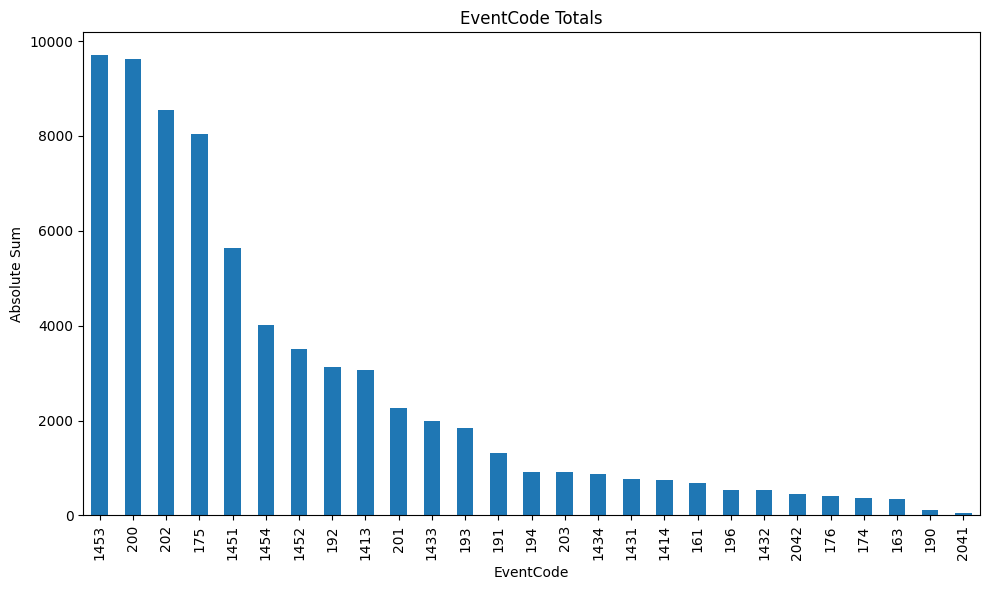

In [27]:
abs_sums_sorted = abs_sums.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10,6))
abs_sums_sorted.plot(kind='bar')
plt.title('EventCode Totals')
plt.xlabel('EventCode')
plt.ylabel('Absolute Sum')
plt.tight_layout()
plt.show()

In [28]:
event_names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         27 non-null     int64 
 1   Description  27 non-null     object
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


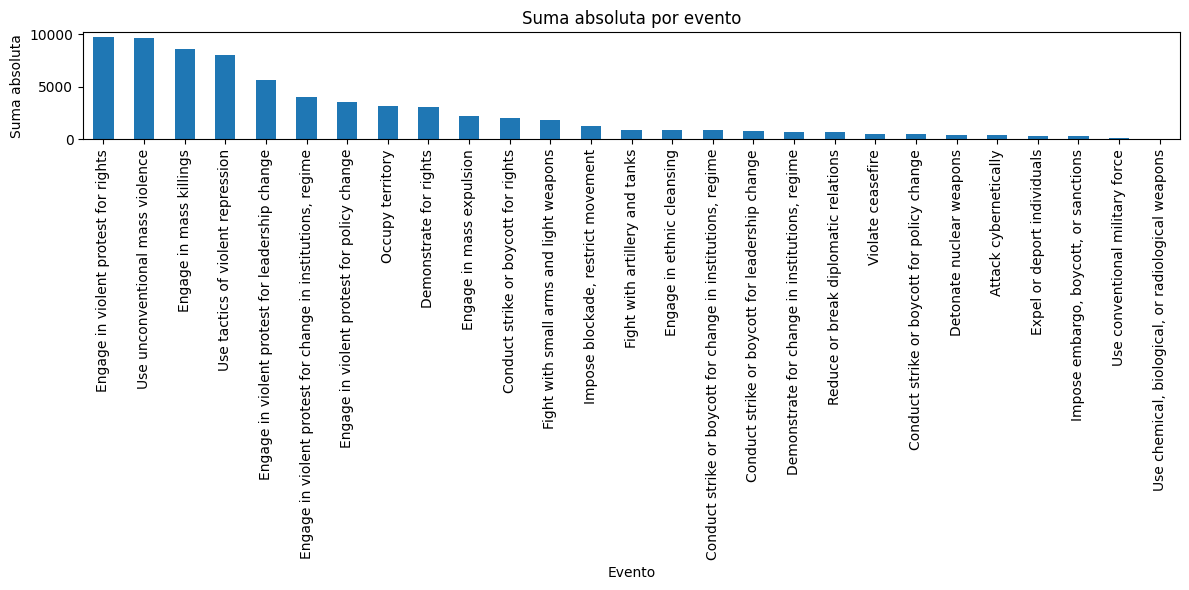

In [29]:
# Crea un diccionario de mapeo
code_to_name = dict(zip(event_names_df['Code'], event_names_df['Description']))

# Crea una lista de nombres en el mismo orden que los índices de abs_sums_sorted
event_names = [code_to_name.get(code, str(code)) for code in abs_sums_sorted.index]

plt.figure(figsize=(12,6))
abs_sums_sorted.plot(kind='bar')
plt.title('Suma absoluta por evento')
plt.xlabel('Evento')
plt.ylabel('Suma absoluta')
plt.xticks(ticks=range(len(event_names)), labels=event_names, rotation=90)  # Mostrar nombres
plt.tight_layout()
plt.show()

<ipython-input-30-1495347305>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


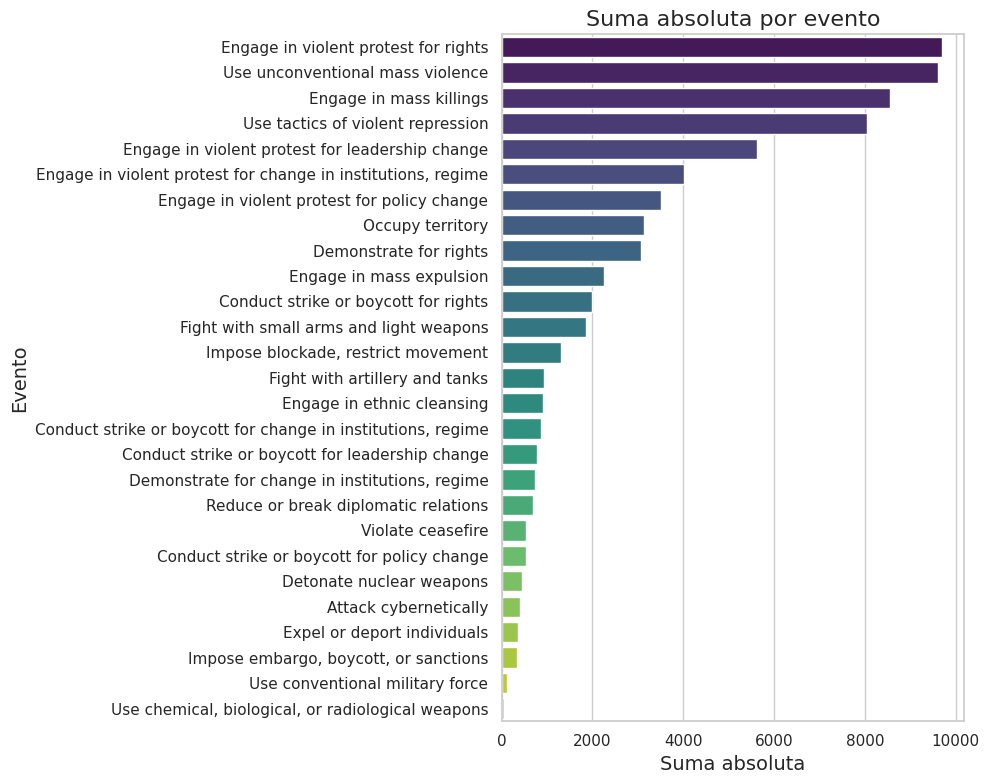

In [30]:
abs_sums_sorted = abs_sums.sort_values(ascending=False)

# Supón que abs_sums_sorted es tu Series ordenada
df_plot = abs_sums_sorted.reset_index()
df_plot.columns = ['EventCode', 'abs_sum']

# Haz el merge con el DataFrame de nombres
df_plot = df_plot.merge(event_names_df, left_on='EventCode', right_on='Code', how='left')

sns.set_theme(style="whitegrid")  # Estilo limpio y profesional[4][2]

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=df_plot,
    y='Description',  # Nombres de los eventosfiltered_df
    x='abs_sum',
    palette='viridis'  # Paleta atractiva y profesional[2][5]
)

ax.set_title('Suma absoluta por evento', fontsize=16)
ax.set_xlabel('Suma absoluta', fontsize=14)
ax.set_ylabel('Evento', fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
df_plot_cluster = abs_sums.reset_index()
df_plot_cluster.columns = ['EventCode', 'abs_sum']
df_plot_cluster = df_plot_cluster.merge(event_names_df, left_on='EventCode', right_on='Code', how='left')

# Crear la columna "cluster" con los dos primeros dígitos del código
df_plot_cluster['cluster'] = df_plot_cluster['EventCode'].astype(str).str[:2]

In [32]:
# Sumar abs_sum por cluster
cluster_sums = df_plot_cluster.groupby('cluster')['abs_sum'].sum()

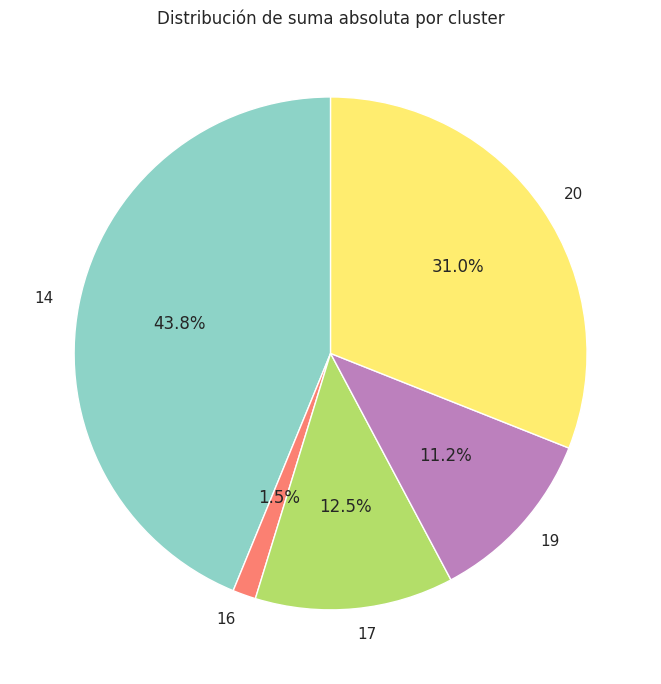

In [33]:
plt.figure(figsize=(7,7))
cluster_sums.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.ylabel('')
plt.title('Distribución de suma absoluta por cluster')
plt.tight_layout()
plt.show()

In [34]:
# Convierte a DataFrame para hacer el merge
cluster_sums_df = cluster_sums.reset_index()
cluster_sums_df.columns = ['cluster', 'abs_sum']

# Une los nombres descriptivos
cluster_sums_df = cluster_sums_df.merge(event_clusters_df, on='cluster', how='left')

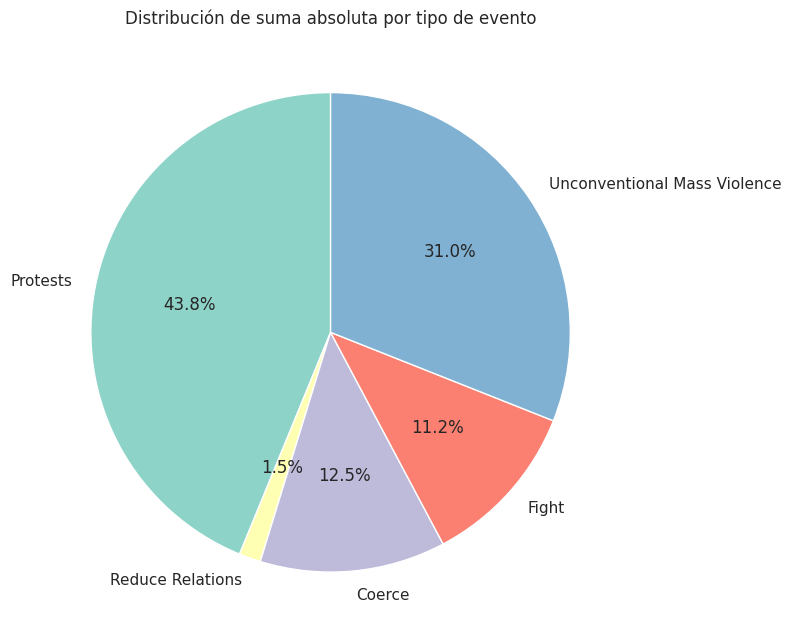

In [35]:
plt.figure(figsize=(8,8))
plt.pie(
    cluster_sums_df['abs_sum'],
    labels=cluster_sums_df['cluster_name'],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors  # paleta agradable
)
plt.title('Distribución de suma absoluta por tipo de evento')
plt.tight_layout()
plt.show()

In [36]:
event_cols = [col for col in cosine_sim_binarized.columns if col not in ['EventCode', 'song_id']]

# Crea una máscara booleana: True si hay al menos un 1 o -1 en la fila
event_mask = (cosine_sim_binarized[event_cols] != 0).any(axis=1)

# Filtra el DataFrame
filtered_df = cosine_sim_binarized[event_mask].copy()

In [37]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30227 entries, 10 to 435840
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   song_id  30227 non-null  int64
 1   1413     30227 non-null  int64
 2   1414     30227 non-null  int64
 3   1431     30227 non-null  int64
 4   1432     30227 non-null  int64
 5   1433     30227 non-null  int64
 6   1434     30227 non-null  int64
 7   1451     30227 non-null  int64
 8   1452     30227 non-null  int64
 9   1453     30227 non-null  int64
 10  1454     30227 non-null  int64
 11  161      30227 non-null  int64
 12  163      30227 non-null  int64
 13  174      30227 non-null  int64
 14  175      30227 non-null  int64
 15  176      30227 non-null  int64
 16  190      30227 non-null  int64
 17  191      30227 non-null  int64
 18  192      30227 non-null  int64
 19  193      30227 non-null  int64
 20  194      30227 non-null  int64
 21  196      30227 non-null  int64
 22  200      30227 non-null  

In [38]:
filtered_df

EventCode,song_id,1413,1414,1431,1432,1433,1434,1451,1452,1453,...,192,193,194,196,200,201,202,203,2041,2042
10,10,0,1,0,0,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
18,18,0,0,0,0,0,0,1,1,1,...,0,0,0,0,1,0,1,0,0,0
21,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
55,55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
109,110,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435782,450052,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435796,450066,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
435811,450082,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
435815,450086,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# # DOWNLOAD SIMILARITY FILTERED DATAFRAME

# # Save results
# filtered_df.to_csv("songs_with_events_df.csv", index=False)

# # Descargar el archivo
# from google.colab import files
# files.download("songs_with_events_df.csv")

In [40]:
abs_sums.index = abs_sums.index.astype(str)  # Asegura que el índice es string

# Extrae los dos primeros dígitos y agrupa
abs_sums_grouped = abs_sums.groupby(abs_sums.index.str[:2]).sum().sort_values(ascending=False)

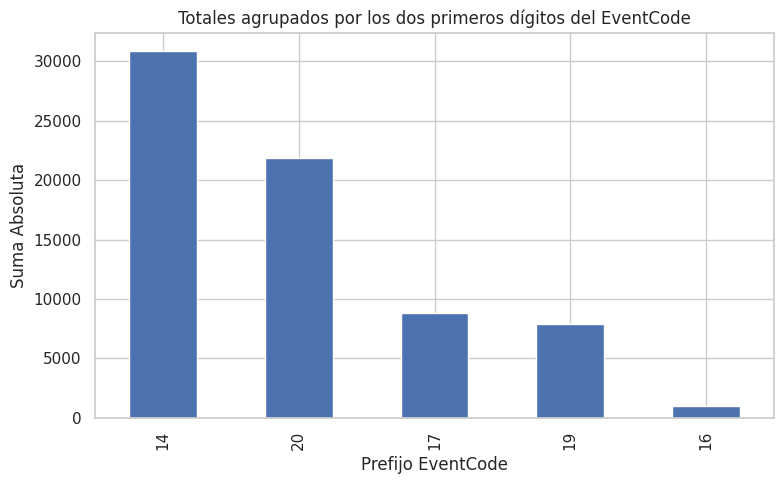

In [41]:
plt.figure(figsize=(8,5))
abs_sums_grouped.plot(kind='bar')
plt.title('Totales agrupados por los dos primeros dígitos del EventCode')
plt.xlabel('Prefijo EventCode')
plt.ylabel('Suma Absoluta')
plt.tight_layout()
plt.show()

In [46]:
event_clusters = """
Code,Description
14,Protest
16,Reduce Relations
17,Coerce
19,Fight
20,Use Unconventional Mass Violence
"""

<ipython-input-42-1688981816>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


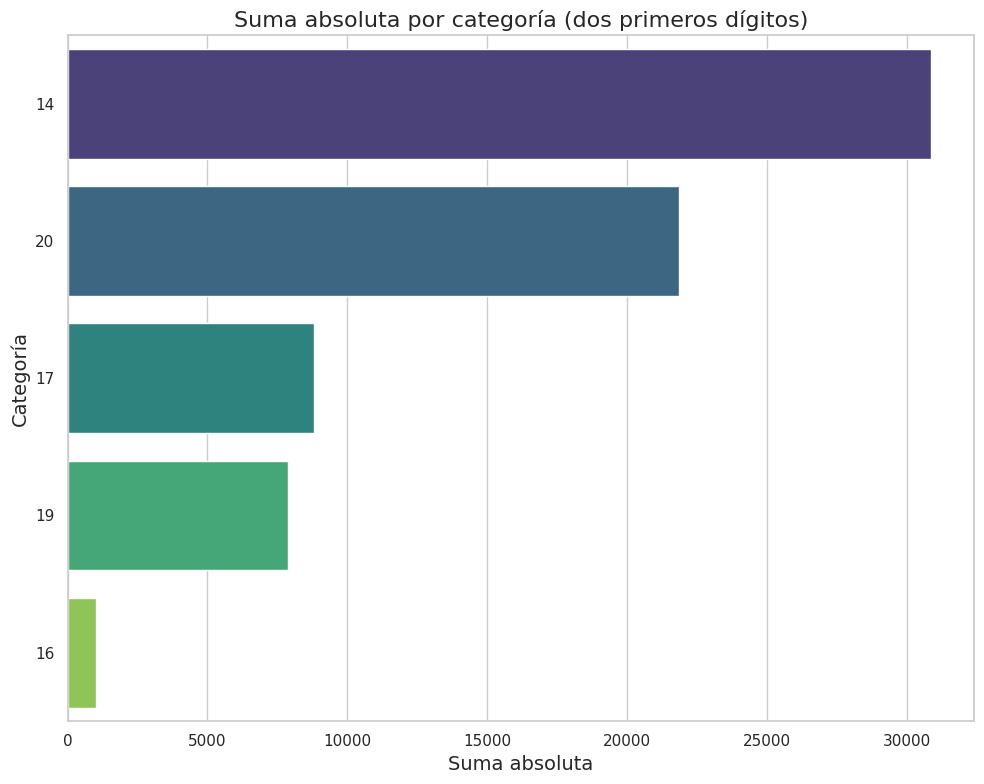

In [42]:
# Paso 1: Agrupa la suma absoluta por los dos primeros dígitos del código
abs_sums.index = abs_sums.index.astype(str)  # Asegura que el índice es string
abs_sums_grouped = abs_sums.groupby(abs_sums.index.str[:2]).sum().sort_values(ascending=False)

# Paso 2: Prepara el DataFrame para la gráfica
df_plot = abs_sums_grouped.reset_index()
df_plot.columns = ['Category', 'abs_sum']

# Paso 3: (Opcional) Si tienes un nombre para cada categoría, puedes hacer merge aquí
# Por ejemplo: df_plot = df_plot.merge(category_names_df, left_on='Category', right_on='Code', how='left')
# Si no tienes, simplemente usas 'Category' como etiqueta

sns.set_theme(style="whitegrid")  # Estilo limpio y profesional[4][2]

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=df_plot,
    y='Category',  # Ahora son los prefijos, no los códigos individuales
    x='abs_sum',
    palette='viridis'  # Paleta atractiva y profesional[2][5]
)

ax.set_title('Suma absoluta por categoría (dos primeros dígitos)', fontsize=16)
ax.set_xlabel('Suma absoluta', fontsize=14)
ax.set_ylabel('Categoría', fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-47-1844575938>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


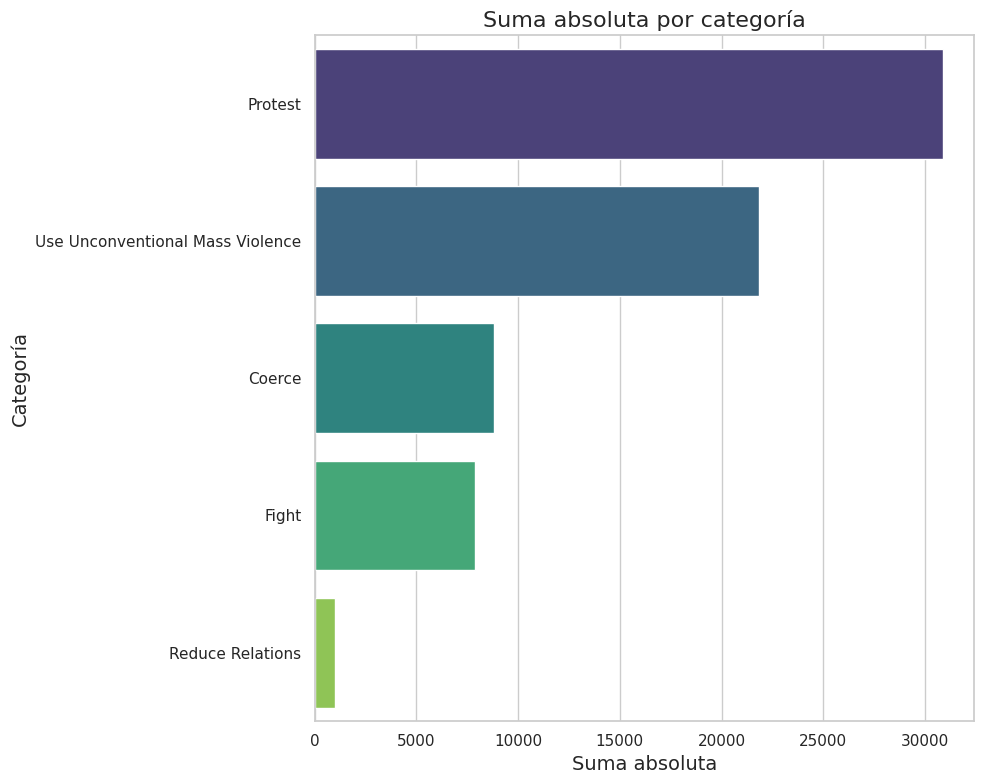

In [47]:
event_names_df = pd.read_csv(StringIO(event_clusters))

# Paso 2: Agrupar la suma absoluta por los dos primeros dígitos del código
abs_sums.index = abs_sums.index.astype(str)  # Asegura que el índice es string
abs_sums_grouped = abs_sums.groupby(abs_sums.index.str[:2]).sum().sort_values(ascending=False)

# Paso 3: Preparar el DataFrame para la gráfica
df_plot = abs_sums_grouped.reset_index()
df_plot.columns = ['Code', 'abs_sum']

# Paso 4: Hacer el merge con los nombres de categoría
df_plot['Code'] = df_plot['Code'].astype(str)
event_names_df['Code'] = event_names_df['Code'].astype(str)
df_plot = df_plot.merge(event_names_df, on='Code', how='left')

sns.set_theme(style="whitegrid")  # Estilo limpio y profesional[4][2]

plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=df_plot,
    y='Description',  # Ahora usa los nombres descriptivos
    x='abs_sum',
    palette='viridis'  # Paleta atractiva y profesional[2][5]
)

ax.set_title('Suma absoluta por categoría', fontsize=16)
ax.set_xlabel('Suma absoluta', fontsize=14)
ax.set_ylabel('Categoría', fontsize=14)
plt.tight_layout()
plt.show()